## **First Unit Disband:** Target Watch Tower (Node 2) vs Random Action

#### Predict winner of game based the following features:
* Player 0 score (target Node 2 "Watch Tower")
* Player 1 score (Random Action)
* Win Type
* Turn Unit Loss Occurred
* Unit Lost Type
* First Player with Unit Disband

####Classifiers used:
* Logistic Regression
* KNN
* Random Forest
* SVM
* XG Boost

In [0]:
# import Logistic Regression, KNN, Random forest, and SVM
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# import xgboost
import xgboost as xgb

# Data Manipulation
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [87]:
url = 'https://raw.githubusercontent.com/shaunhyp57/LMCO-Everglades-Robot-Behavior-Analytics/master/analytics/ml_models/First%20Unit%20Disband/datasets/firstUnitLost_target2_randact.csv'
data = pd.read_csv(url)

data.head()

,numberOfTurns,winType,player_0,player_1,unitLossTurn,unitLostPlayer,unitLostType,combinedStat,winner
0,150.0,1,1239,1505,31.0,1,1,1,1
1,112.0,2,3412,511,30.0,1,3,3,0
2,150.0,1,1268,1833,33.0,1,1,1,1
3,150.0,1,1330,1138,18.0,1,1,1,0
4,150.0,1,1827,905,31.0,1,1,1,0


In [88]:
del data['combinedStat']

# Used to categorize the winner of the game based on the score of the player column
players={'player_0':0, 'player_1':1}

data.head()

,numberOfTurns,winType,player_0,player_1,unitLossTurn,unitLostPlayer,unitLostType,winner
0,150.0,1,1239,1505,31.0,1,1,1
1,112.0,2,3412,511,30.0,1,3,0
2,150.0,1,1268,1833,33.0,1,1,1
3,150.0,1,1330,1138,18.0,1,1,0
4,150.0,1,1827,905,31.0,1,1,0


In [89]:
# Total number of matches
n_matches = data.shape[0]

# Calculate number of features. '-1' because one is saved as target
n_features = data.shape[1] - 1

# Calculate matches won by Player 0
n_player0wins = len(data[data.winner == 0])

# Calculate win rate for Player 0
win_rate = (float(n_player0wins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by Player 0: {}".format(n_player0wins))
print("Win rate of Player 0: {:.2f}%".format(win_rate))

Total number of matches: 983
Number of features: 7
Number of matches won by Player 0: 354
Win rate of Player 0: 36.01%


In [90]:
feature_cols = ['numberOfTurns', 'winType', 'player_0','player_1','unitLossTurn','unitLostPlayer','unitLostType']
X = data[feature_cols]
y = data['winner']

# Standardising the data.
from sklearn.preprocessing import scale

X = pd.DataFrame(scale(X), columns=feature_cols, index=data.index)

X.head()

,numberOfTurns,winType,player_0,player_1,unitLossTurn,unitLostPlayer,unitLostType
0,0.307538,-0.369346,-0.184649,-0.098819,0.049361,0.305675,-0.577484
1,-2.560822,2.707491,2.691774,-1.819252,-0.063744,0.305675,1.896010
2,0.307538,-0.369346,-0.146261,0.468890,0.275572,0.305675,-0.577484
3,0.307538,-0.369346,-0.064191,-0.734029,-1.421010,0.305675,-0.577484
4,0.307538,-0.369346,0.593693,-1.137310,0.049361,0.305675,-0.577484


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4, stratify = y)

In [0]:
#for measuring training time
from time import time 
#for measuring accuracy. Considers both precision and recall to compute score
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))
    
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label=0), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    # print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [93]:
# Initialize the four models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = KNeighborsClassifier(n_neighbors=10)
clf_C = RandomForestClassifier(max_depth = 2, random_state=0)
clf_D = SVC(random_state = 912, kernel='rbf')

# Boosting refers to this general problem of producing a very accurate prediction rule 
# by combining rough and moderately inaccurate rules-of-thumb
clf_E = xgb.XGBClassifier(seed = 2)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_D, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_E, X_train, y_train, X_test, y_test)

Training a LogisticRegression using a training set size of 786. . .
Trained model in 0.0104 seconds
Made predictions in 0.0006 seconds.
F1 score and accuracy score for training set: 0.9893 , 0.9924.
Made predictions in 0.0006 seconds.
F1 score and accuracy score for test set: 0.9635 , 0.9746.

Training a KNeighborsClassifier using a training set size of 786. . .
Trained model in 0.0013 seconds
Made predictions in 0.0254 seconds.
F1 score and accuracy score for training set: 0.9701 , 0.9784.
Made predictions in 0.0067 seconds.
F1 score and accuracy score for test set: 0.9379 , 0.9543.

Training a RandomForestClassifier using a training set size of 786. . .
Trained model in 0.1210 seconds
Made predictions in 0.0102 seconds.
F1 score and accuracy score for training set: 0.8725 , 0.9186.
Made predictions in 0.0079 seconds.
F1 score and accuracy score for test set: 0.8640 , 0.9137.

Training a SVC using a training set size of 786. . .
Trained model in 0.0086 seconds
Made predictions in 0.00

### **Grid Search Cross Validation**

We perform Grid Search CV, which is the process of performing hyper parameter tuning in order to determine the optimal values for a given model

In [0]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def train_grid_search(clf, params, X_train, y_train, X_test, y_test, kfolds):
    # Make an f1 scoring function using 'make_scorer'
    f1_scorer = make_scorer(f1_score,pos_label=0)

    # Perform grid search on the classifier using the f1_scorer as the scoring method
    grid_search = GridSearchCV(
                          clf, 
                          scoring = f1_scorer, 
                          param_grid=params,
                          cv = kfolds
                  )
    # Fit the grid search object to the training data and find the optimal parameters
    grid_search = grid_search.fit(X_train,y_train)

    # Get the estimator
    grid_search_best = grid_search.best_estimator_
    #print(log_reg_best)

    # Report the final F1 score for training and testing after parameter tuning
    f1, acc = predict_labels(grid_search_best, X_train, y_train)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
        
    f1, acc = predict_labels(grid_search_best, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

    return grid_search, grid_search_best

def log_reg_gridsearch(X_train, y_train, X_test, y_test, nfolds):
    paramsLogReg = {
        'penalty' : ['l1', 'l2'],
        'C': [0.001,0.009,0.01,0.09,1,5,10,25],
        'solver' : ['liblinear'],
        'max_iter' : [100, 1000,2500, 5000]
    }

    # Initialize the classifier
    clf = LogisticRegression()

    return train_grid_search(clf, paramsLogReg, X_train, y_train, X_test, y_test, nfolds)


def knn_gridsearch(X_train, y_train, X_test, y_test, nfolds):
    paramsKNN = { 
        'n_neighbors' : [3,5,11,19],
        'weights' : ['uniform','distance'],
        'metric' : ['euclidean', 'manhattan']
    }

    # Initialize the classifier
    clf = KNeighborsClassifier()
    return train_grid_search(clf, paramsKNN, X_train, y_train, X_test, y_test, nfolds)

def random_forest_gridsearch(X_train, y_train, X_test, y_test, nfolds):
    # Number of trees in random forest
    # n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    n_estimators = [50, 150, 250]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    paramsRandForest = {
      'n_estimators': [50, 150, 250],
      'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
      'min_samples_split': [2, 4, 6]
    }

    # Initialize the classifier
    clf = RandomForestClassifier(random_state=1)

    return train_grid_search(clf, paramsRandForest, X_train, y_train, X_test, y_test, nfolds)


def svm_gridsearch(X_train, y_train, X_test, y_test, nfolds):
    paramsSVM = {
      'C': [0.1,1, 10, 100], 
      'gamma': [1,0.1,0.01,0.001],
      'kernel': ['rbf', 'poly', 'sigmoid']
    }

    # Initialize the classifier
    clf = SVC()

    return train_grid_search(clf, paramsSVM, X_train, y_train, X_test, y_test, nfolds)


def xg_boost_gridsearch(X_train, y_train, X_test, y_test, nfolds):
    paramsXGB = {
      'learning_rate' : [0.1, 0.01, 0.05],
      'n_estimators' : range(60, 220, 40),
      'max_depth': range (2, 10, 1),
      'min_child_weight': [3],
      'gamma':[0.4],
      'subsample' : [0.8],
      'colsample_bytree' : [0.8],
      'scale_pos_weight' : [1],
      'reg_alpha':[1e-5]
    }
    """paramsXGB = {
      'n_estimators': [50,100,150,250,300,400,500,1000],
      'max_depth': [5,6,7,8,9,10],
      'max_delta_step': [0,1,2,3,4,5,6,7,8,9,10],
      'min_child_weight': [1,2,3,4,5],
      'subsample': [0.5,0.6,0.7,0.8,0.9,1],
      'colsample_bytree': [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
      'colsample_bylevel': [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
      'learning_rate': [0.002,0.005,0.007,0.008,0.01,0.05,0.07,0.1,0.25,0.5] 
    }"""

    # Initialize the classifier
    clf = xgb.XGBClassifier(seed=2)

    return train_grid_search(clf, paramsXGB, X_train, y_train, X_test, y_test, nfolds)

In [0]:
from sklearn.metrics import plot_confusion_matrix

def display_confusion_matrix(clf, X_test, y_test):
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix", None)]

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                    cmap=plt.cm.Blues,
                                    values_format = '.5g',
                                    normalize=normalize)
        disp.ax_.set_title(title)

        #print(title)
        #print(disp.confusion_matrix)

    plt.show()

We perform Grid Search CV on the model that produced the highest accuracy to see if we can get optimized solution with tuned parameters

In [106]:
kfolds = 10

xg_boost, xgb_best = xg_boost_gridsearch(X_train, y_train, X_test, y_test, kfolds)

Made predictions in 0.0030 seconds.
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0014 seconds.
F1 score and accuracy score for test set: 0.9718 , 0.9797.


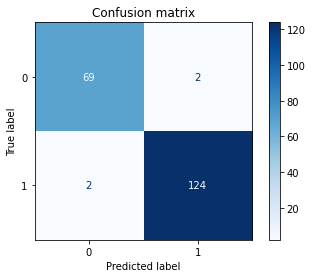

In [107]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

display_confusion_matrix(xg_boost, X_test, y_test)

In [108]:
from sklearn.ensemble import VotingClassifier

# create a dictionary of the models
log_reg, log_reg_best = log_reg_gridsearch(X_train, y_train, X_test, y_test, kfolds)
print('')
knn, knn_best = knn_gridsearch(X_train, y_train, X_test, y_test, kfolds)
print('')
rf, rf_best = random_forest_gridsearch(X_train, y_train, X_test, y_test, kfolds)
print('')
svm, svm_best = svm_gridsearch(X_train, y_train, X_test, y_test, kfolds)

estimators = [('log_reg', log_reg_best),('knn', knn_best), ('rf', rf_best), ('svm', svm_best)]

# create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

Made predictions in 0.0005 seconds.
F1 score and accuracy score for training set: 0.9965 , 0.9975.
Made predictions in 0.0005 seconds.
F1 score and accuracy score for test set: 1.0000 , 1.0000.

Made predictions in 0.0115 seconds.
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0036 seconds.
F1 score and accuracy score for test set: 0.9571 , 0.9695.

Made predictions in 0.0250 seconds.
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0184 seconds.
F1 score and accuracy score for test set: 0.9790 , 0.9848.

Made predictions in 0.0024 seconds.
F1 score and accuracy score for training set: 0.9876 , 0.9911.
Made predictions in 0.0011 seconds.
F1 score and accuracy score for test set: 0.9857 , 0.9898.


In [22]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

0.9949238578680203